In [1]:
from include import *
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import GPyOpt

Using TensorFlow backend.


data is from https://www.kaggle.com/ashish8898/hand-gestures
<br /> code is modified from by https://machinelearningmastery.com/5-step-life-cycle-neural-network-models-keras/ and
<br /> http://krasserm.github.io/2018/03/21/bayesian-optimization/

In [2]:
df = []
for i in range(4):
    t = np.loadtxt("data/emg-4/{}.csv".format(i), delimiter=',')
    t = pd.DataFrame(t)
    t['gesture'] = i
    df.append(t)
df = pd.concat(df).reset_index(drop=True)
# creatue dummy variables
df = pd.merge(df, pd.get_dummies(df['gesture'], drop_first=True, prefix='g'), left_index=True, right_index=True)

In [3]:
# data splitting
X = df.iloc[:, :65].values
y = df.iloc[:, -3:].values
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25)

In [4]:
model = Sequential()
model.add(Dense(30, input_dim=65, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

In [16]:
domain = [{'name': 'epochs', 'type': 'discrete', 'domain': range(50)},
          {'name': 'batch_size', 'type': 'discrete', 'domain': range(1000)}]

In [17]:
def obj(parameters):
    parameters = parameters[0]
    epochs, batch_size = parameters
    X_tr1, X_tr2, y_tr1, y_tr2 = train_test_split(X_tr, y_tr, test_size=0.25)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_tr1, y_tr1, epochs=int(epochs), batch_size=int(batch_size))
    scores = model.evaluate(X_tr2, y_tr2)
    return scores[0]

In [18]:
opt = GPyOpt.methods.BayesianOptimization(f=obj, domain=domain, verbosity=0)

Epoch 1/22
6568/6568 [==============================] - 1s 111us/step - loss: 0.0087 - acc: 0.9989
Epoch 2/22
6568/6568 [==============================] - 0s 13us/step - loss: 0.0066 - acc: 0.9993
Epoch 3/22
6568/6568 [==============================] - 0s 15us/step - loss: 0.0051 - acc: 0.9994
Epoch 4/22
6568/6568 [==============================] - 0s 14us/step - loss: 0.0045 - acc: 0.9995
Epoch 5/22
6568/6568 [==============================] - 0s 13us/step - loss: 0.0040 - acc: 0.9995
Epoch 6/22
6568/6568 [==============================] - 0s 14us/step - loss: 0.0038 - acc: 0.9996
Epoch 7/22
6568/6568 [==============================] - 0s 13us/step - loss: 0.0038 - acc: 0.9995
Epoch 8/22
6568/6568 [==============================] - 0s 13us/step - loss: 0.0035 - acc: 0.9997
Epoch 9/22
6568/6568 [==============================] - 0s 13us/step - loss: 0.0033 - acc: 0.9997
Epoch 10/22
6568/6568 [==============================] - 0s 12us/step - loss: 0.0029 - acc: 0.9998
Epoch 11/22
6568/6

In [19]:
opt.run_optimization(max_iter=50, max_time=1200)

Epoch 1/39
6568/6568 [==============================] - 1s 124us/step - loss: 0.0344 - acc: 0.9904
Epoch 2/39
6568/6568 [==============================] - 0s 6us/step - loss: 0.0232 - acc: 0.9940
Epoch 3/39
6568/6568 [==============================] - 0s 6us/step - loss: 0.0188 - acc: 0.9951
Epoch 4/39
6568/6568 [==============================] - 0s 6us/step - loss: 0.0166 - acc: 0.9958
Epoch 5/39
6568/6568 [==============================] - 0s 6us/step - loss: 0.0150 - acc: 0.9967
Epoch 6/39
6568/6568 [==============================] - 0s 6us/step - loss: 0.0137 - acc: 0.9972
Epoch 7/39
6568/6568 [==============================] - 0s 6us/step - loss: 0.0124 - acc: 0.9974
Epoch 8/39
6568/6568 [==============================] - 0s 7us/step - loss: 0.0112 - acc: 0.9977
Epoch 9/39
6568/6568 [==============================] - 0s 7us/step - loss: 0.0104 - acc: 0.9982
Epoch 10/39
6568/6568 [==============================] - 0s 6us/step - loss: 0.0098 - acc: 0.9985
Epoch 11/39
6568/6568 [====

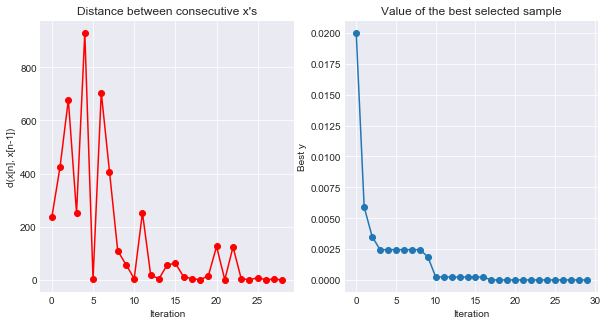

In [20]:
opt.plot_convergence()

In [21]:
model.fit(X_tr, y_tr, epochs=int(opt.x_opt[0]), batch_size=int(opt.x_opt[1])) 

In [22]:
scores = model.evaluate(X_te, y_te)

2920/2920 [==============================] - 0s 67us/step


In [23]:
print("{}: {:.4f}%".format(model.metrics_names[1], scores[1]*100.0))

acc: 97.8653%
